In [1]:
data_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/"
leads_filename = paste0(data_folder,"eqtl/pool1_17.eqtl_discovery_all_leads.fdr0.1.tsv")
leads = read.csv(leads_filename, header = T, sep = "\t")
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,⋯,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,⋯,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,⋯,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [2]:
leads5pct = leads[leads$global_corr_p_value < 0.05,]

In [3]:
celltypes = unique(leads5pct$label)
library(hash)
egenes = hash() 
for (celltype in celltypes){
    print(celltype)
    res = leads5pct[leads5pct$label == celltype,]
    egenes[celltype] <- unique(res$feature_id)
}

hash-2.2.6.1 provided by Decision Patterns



[1] "FPP_D11"
[1] "P_FPP_D11"
[1] "DA_D30"
[1] "Sert_D30"
[1] "Epen1_D30"
[1] "Astro_D30"
[1] "DA_D52"
[1] "Sert_D52"
[1] "Epen1_D52"
[1] "Astro_D52"


In [4]:
DA_NONE_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/results/top_qtl_results_all.txt"
DA_NONE = read.csv(DA_NONE_file,sep="\t")
DA_NONE$q_value = p.adjust(DA_NONE$empirical_feature_p_value, method = "BH")
# nrow(DA_NONE[DA_NONE$q_value < 0.05,])
egenes['DA_NONE_D52'] <- DA_NONE[DA_NONE$q_value < 0.05,'feature_id']

[1] 698

In [14]:
Sert_NONE_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Sert/results/top_qtl_results_all.txt"
Sert_NONE = read.csv(Sert_NONE_file,sep="\t")
Sert_NONE$q_value = p.adjust(Sert_NONE$empirical_feature_p_value, method = "BH")
egenes['Sert_NONE_D52'] <- Sert_NONE[Sert_NONE$q_value < 0.05,'feature_id']

In [16]:
Epen1_NONE_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Epen1/results/top_qtl_results_all.txt"
Epen1_NONE = read.csv(Epen1_NONE_file,sep="\t")
Epen1_NONE$q_value = p.adjust(Epen1_NONE$empirical_feature_p_value, method = "BH")
egenes['Epen1_NONE_D52'] <- Epen1_NONE[Epen1_NONE$q_value < 0.05,'feature_id']

In [19]:
Astro_NONE_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_Astro/results/top_qtl_results_all.txt"
Astro_NONE = read.csv(Astro_NONE_file,sep="\t")
Astro_NONE$q_value = p.adjust(Astro_NONE$empirical_feature_p_value, method = "BH")
egenes['Astro_NONE_D52'] <- Astro_NONE[Astro_NONE$q_value < 0.05,'feature_id']

In [22]:
DA_ROT_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_DA/results/top_qtl_results_all.txt"
DA_ROT = read.csv(DA_ROT_file,sep="\t")
DA_ROT$q_value = p.adjust(DA_ROT$empirical_feature_p_value, method = "BH")
egenes['DA_ROT_D52'] <- DA_ROT[DA_ROT$q_value < 0.05,'feature_id']

In [12]:
Sert_ROT_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Sert/results/top_qtl_results_all.txt"
Sert_ROT = read.csv(Sert_ROT_file,sep="\t")
Sert_ROT$q_value = p.adjust(Sert_ROT$empirical_feature_p_value, method = "BH")
egenes['Sert_ROT_D52'] <- Sert_ROT[Sert_ROT$q_value < 0.05,'feature_id']

In [17]:
Epen1_ROT_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Epen1/results/top_qtl_results_all.txt"
Epen1_ROT = read.csv(Epen1_ROT_file,sep="\t")
Epen1_ROT$q_value = p.adjust(Epen1_ROT$empirical_feature_p_value, method = "BH")
egenes['Epen1_ROT_D52'] <- Epen1_ROT[Epen1_ROT$q_value < 0.05,'feature_id']

In [20]:
Astro_ROT_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_ROT_treated/celltype_Astro/results/top_qtl_results_all.txt"
Astro_ROT = read.csv(Astro_ROT_file,sep="\t")
Astro_ROT$q_value = p.adjust(Astro_ROT$empirical_feature_p_value, method = "BH")
egenes['Astro_ROT_D52'] <- Astro_ROT[Astro_ROT$q_value < 0.05,'feature_id']

In [23]:
keys(egenes)

[1] "Astro_D30"      "Astro_D52"      "Astro_NONE_D52" "Astro_ROT_D52" 
 [5] "DA_D30"         "DA_D52"         "DA_NONE_D52"    "DA_ROT_D52"    
 [9] "Epen1_D30"      "Epen1_D52"      "Epen1_NONE_D52" "Epen1_ROT_D52" 
[13] "FPP_D11"        "P_FPP_D11"      "Sert_D30"       "Sert_D52"      
[17] "Sert_NONE_D52"  "Sert_ROT_D52"

In [24]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

In [25]:
eqtls <- c(length(egenes[["FPP_D11"]]),length(egenes[['P_FPP_D11']]),
           
           length(egenes[["DA_D30"]]),length(egenes[['Sert_D30']]),
           length(egenes[["Epen1_D30"]]),length(egenes[['Astro_D30']]),
           
           length(egenes[["DA_NONE_D52"]]),length(egenes[['Sert_NONE_D52']]),
           length(egenes[["Epen1_NONE_D52"]]),length(egenes[['Astro_NONE_D52']]),
           
           length(egenes[["DA_ROT_D52"]]),length(egenes[['Sert_ROT_D52']]),
           length(egenes[["Epen1_ROT_D52"]]),length(egenes[['Astro_ROT_D52']])
          
          )
eqtls

[1] 1781 1799  672  545  621  617  698  778  745  111  304  611  575   88

In [ ]:
##### how many eqtl are also interaction QTL

In [26]:
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/DA_FDR0.1.tsv",header = T)
inter_egenes = as.character(inter_ROT$combined_feature_id)
# head(inter_egenes)
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Sert_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Epen1_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Astro_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000003147_ICA1"  "ENSG00000007541_PIGQ"  "ENSG00000015532_XYLT2"
[4] "ENSG00000016391_CHDH"  "ENSG00000037474_NSUN2" "ENSG00000037757_MRI1"

In [49]:
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/DA_FDR0.05.tsv",header = T)
inter_egenes = as.character(inter_ROT$combined_feature_id)
# head(inter_egenes)
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Sert_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Epen1_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Astro_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000095209_TMEM38B"  "ENSG00000160602_NEK8"    
[3] "ENSG00000171067_C11orf24" "ENSG00000243317_C7orf73" 
[5] "ENSG00000183891_TTC32"    "ENSG00000015532_XYLT2"

In [50]:
interaction_qtl <- c(length(egenes[["FPP_D11"]][egenes[["FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["P_FPP_D11"]][egenes[["P_FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_D30"]][egenes[["DA_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D30"]][egenes[["Sert_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D30"]][egenes[["Epen1_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D30"]][egenes[["Astro_D30"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_NONE_D52"]][egenes[["DA_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_NONE_D52"]][egenes[["Sert_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_NONE_D52"]][egenes[["Epen1_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_NONE_D52"]][egenes[["Astro_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_ROT_D52"]][egenes[["DA_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_ROT_D52"]][egenes[["Sert_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_ROT_D52"]][egenes[["Epen1_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_ROT_D52"]][egenes[["Astro_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]))

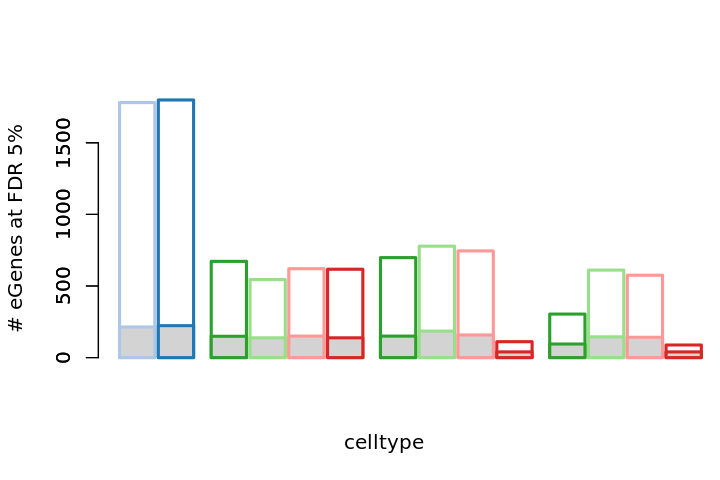

In [51]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,15)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(interaction_qtl, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


In [36]:
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/DA_FDR0.1.tsv",header = T)
inter_egenes = as.character(inter_mat$combined_feature_id)
# head(inter_egenes)
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Sert_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Epen1_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Astro_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000001460_STPG1"   "ENSG00000004059_ARF5"   
[3] "ENSG00000005882_PDK2"    "ENSG00000006016_CRLF1"  
[5] "ENSG00000006282_SPATA20" "ENSG00000008838_MED24"

In [52]:
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/DA_FDR0.05.tsv",header = T)
inter_egenes = as.character(inter_mat$combined_feature_id)
# head(inter_egenes)
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Sert_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Epen1_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Astro_FDR0.05.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000006016_CRLF1"   "ENSG00000006282_SPATA20"
[3] "ENSG00000010219_DYRK4"   "ENSG00000021300_PLEKHB1"
[5] "ENSG00000023330_ALAS1"   "ENSG00000028203_VEZT"

In [53]:
interaction_qtl <- c(length(egenes[["FPP_D11"]][egenes[["FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["P_FPP_D11"]][egenes[["P_FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_D30"]][egenes[["DA_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D30"]][egenes[["Sert_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D30"]][egenes[["Epen1_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D30"]][egenes[["Astro_D30"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_NONE_D52"]][egenes[["DA_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_NONE_D52"]][egenes[["Sert_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_NONE_D52"]][egenes[["Epen1_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_NONE_D52"]][egenes[["Astro_NONE_D52"]] %in% gsub("_.*","",inter_egenes)]),

length(egenes[["DA_ROT_D52"]][egenes[["DA_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_ROT_D52"]][egenes[["Sert_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_ROT_D52"]][egenes[["Epen1_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_ROT_D52"]][egenes[["Astro_ROT_D52"]] %in% gsub("_.*","",inter_egenes)]))

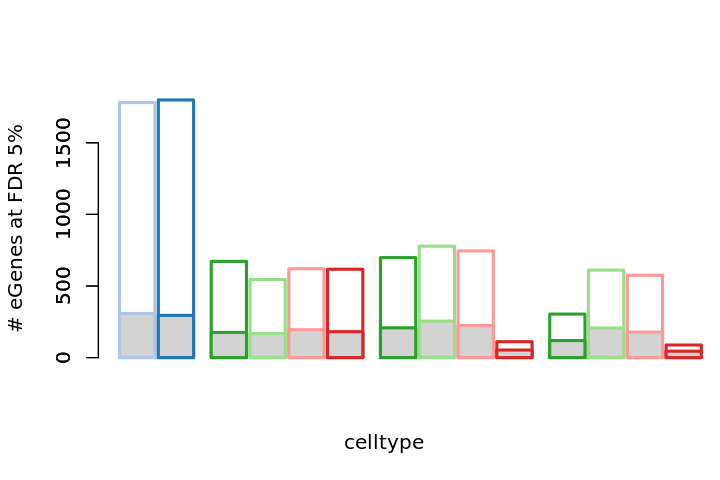

In [54]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,15)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(interaction_qtl, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


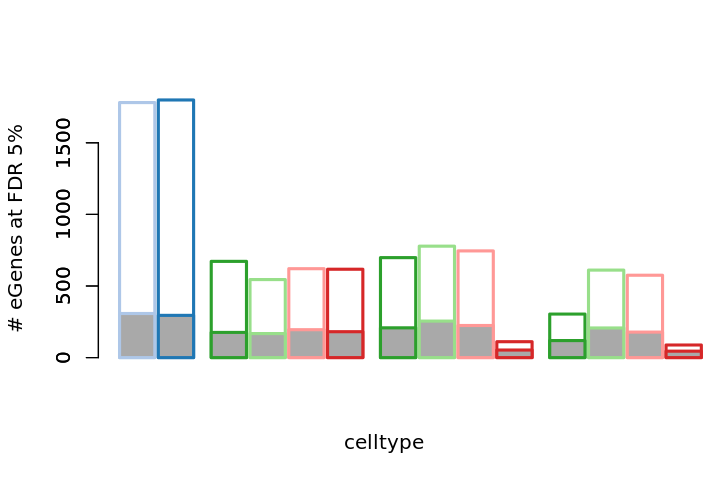

In [55]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,15)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(interaction_qtl, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


In [ ]:
##### how many eqtl (egenes) are shared across cell types

In [59]:
relevant_celltypes <- keys(egenes)
relevant_celltypes
relevant_celltypes = relevant_celltypes[!(relevant_celltypes %in% c('DA_D52','Sert_D52','Epen1_D52','Astro_D52'))]
relevant_celltypes

[1] "Astro_D30"      "Astro_D52"      "Astro_NONE_D52" "Astro_ROT_D52" 
 [5] "DA_D30"         "DA_D52"         "DA_NONE_D52"    "DA_ROT_D52"    
 [9] "Epen1_D30"      "Epen1_D52"      "Epen1_NONE_D52" "Epen1_ROT_D52" 
[13] "FPP_D11"        "P_FPP_D11"      "Sert_D30"       "Sert_D52"      
[17] "Sert_NONE_D52"  "Sert_ROT_D52"

[1] "Astro_D30"      "Astro_NONE_D52" "Astro_ROT_D52"  "DA_D30"        
 [5] "DA_NONE_D52"    "DA_ROT_D52"     "Epen1_D30"      "Epen1_NONE_D52"
 [9] "Epen1_ROT_D52"  "FPP_D11"        "P_FPP_D11"      "Sert_D30"      
[13] "Sert_NONE_D52"  "Sert_ROT_D52"

In [70]:
relevant_celltypes <- c('FPP_D11','P_FPP_D11',
                        'DA_D30','Sert_D30','Epen1_D30','Astro_D30',
                        'DA_NONE_D52','Sert_NONE_D52','Epen1_NONE_D52','Astro_NONE_D52',
                        'DA_ROT_D52','Sert_ROT_D52','Epen1_ROT_D52','Astro_ROT_D52')
length(relevant_celltypes)

[1] 14

In [71]:
eqtls_unique <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0)
eqtls_shared_max2 <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0)
eqtls_shared_atleast3 <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0)

for (i in 1:length(relevant_celltypes)){
# for (i in 1){
    celltype = relevant_celltypes[i]
    egs = egenes[[celltype]]
    for (gene in egs){
#         print(gene)
        n = 0
        for (ct in relevant_celltypes){
            if (gene %in% egenes[[ct]]){
                n = n+1
            }
        }
        if (n == 1){eqtls_unique[i] = eqtls_unique[i]+1}
        if (n > 1 && n <= 3){eqtls_shared_max2[i] = eqtls_shared_max2[i]+1}
        if (n > 3){eqtls_shared_atleast3[i] = eqtls_shared_atleast3[i]+1}
    }
}

In [72]:
eqtls_unique + eqtls_shared_max2 + eqtls_shared_atleast3
eqtls

[1] 1781 1799  672  545  621  617  698  778  745  111  304  611  575   88

[1] 1781 1799  672  545  621  617  698  778  745  111  304  611  575   88

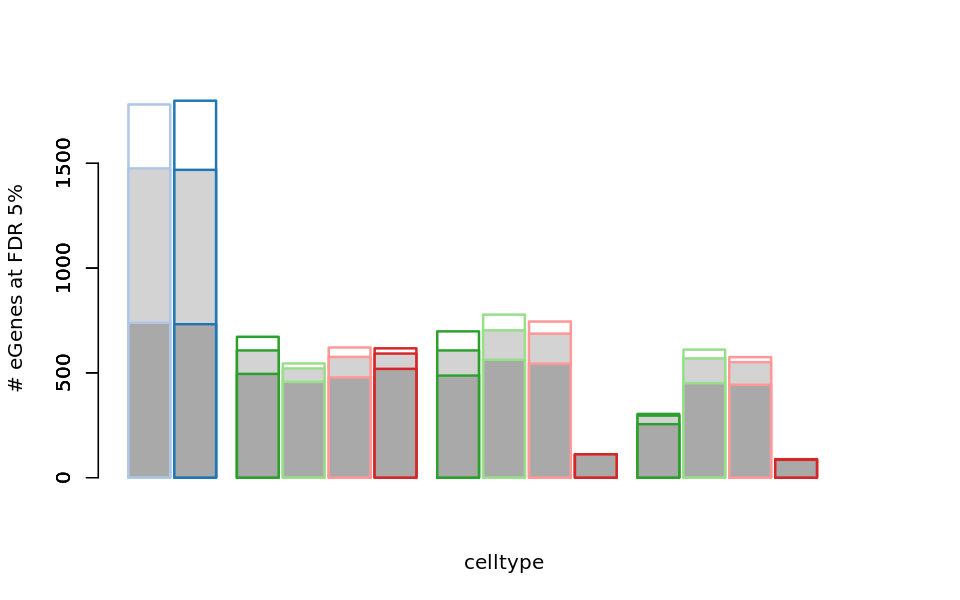

In [76]:
options(repr.plot.width = 8, repr.plot.height = 5)
my.xlim = c(0, 1810)
my.ylim = c(0,18)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(eqtls_shared_max2+eqtls_shared_atleast3, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)

barplot(eqtls_shared_atleast3, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)